In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras import layers, models
from sklearn.model_selection import train_test_split

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
from tensorflow.keras.utils import to_categorical


y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [6]:
xsub_train, x_val, ysub_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

##Model 1

In [7]:
model1 = models.Sequential()

model1.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.25))
model1.add(layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D(2, 2))

model1.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.25))
model1.add(layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D(2, 2))

model1.add(layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.25))
model1.add(layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D(2, 2))

model1.add(layers.Flatten())  
model1.add(layers.Dense(256, activation = 'relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.25))
model1.add(layers.Dense(10, activation = 'softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0

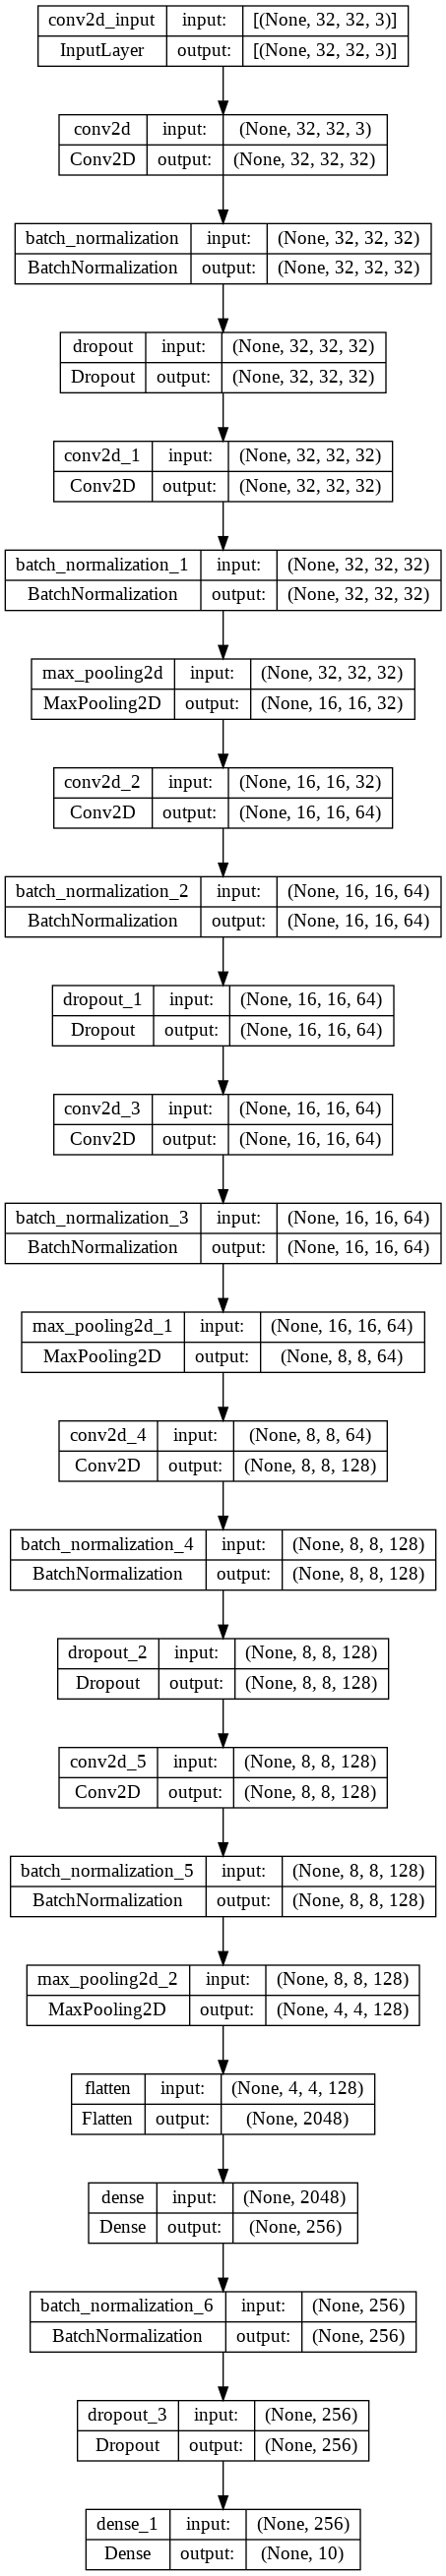

In [9]:
from keras.utils.vis_utils import plot_model


plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [8]:
model1.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
history = model1.fit(xsub_train, ysub_train, epochs=15, batch_size = 128, validation_data=(x_val, y_val), verbose = 1)

Epoch 1/15
313/313 [==============================] - 17s 25ms/step - loss: 1.5388 - accuracy: 0.4661 - val_loss: 2.8294 - val_accuracy: 0.2472
Epoch 2/15
313/313 [==============================] - 7s 21ms/step - loss: 0.9652 - accuracy: 0.6614 - val_loss: 1.0430 - val_accuracy: 0.6353
Epoch 3/15
313/313 [==============================] - 7s 21ms/step - loss: 0.7622 - accuracy: 0.7355 - val_loss: 1.1330 - val_accuracy: 0.6367
Epoch 4/15
313/313 [==============================] - 6s 20ms/step - loss: 0.6466 - accuracy: 0.7733 - val_loss: 1.0241 - val_accuracy: 0.6698
Epoch 5/15
313/313 [==============================] - 6s 20ms/step - loss: 0.5563 - accuracy: 0.8023 - val_loss: 0.7910 - val_accuracy: 0.7379
Epoch 6/15
313/313 [==============================] - 6s 20ms/step - loss: 0.4890 - accuracy: 0.8282 - val_loss: 0.7408 - val_accuracy: 0.7546
Epoch 7/15
313/313 [==============================] - 6s 20ms/step - loss: 0.4286 - accuracy: 0.8501 - val_loss: 0.6881 - val_accuracy: 0.773

In [10]:
_, accuracy = model1.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

1563/1563 [==============================] - 6s 4ms/step - loss: 0.3179 - accuracy: 0.9020
Accuracy: 90.20


In [11]:
_, accuracy = model1.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 4ms/step - loss: 0.7860 - accuracy: 0.7763
Accuracy: 77.63


##Model 2

changed the activation functions

In [12]:
model2 = models.Sequential()

model2.add(layers.Conv2D(32, (4, 4), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.25))
model2.add(layers.Conv2D(32, (4, 4), activation = 'relu', padding = 'same'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(2, 2))

model2.add(layers.Conv2D(64, (4, 4), activation = 'relu', padding = 'same'))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.25))
model2.add(layers.Conv2D(64, (4, 4), activation = 'relu', padding = 'same'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(2, 2))

model2.add(layers.Conv2D(128, (4, 4), activation = 'relu', padding = 'same'))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.25))
model2.add(layers.Conv2D(128, (4, 4), activation = 'relu', padding = 'same'))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D(2, 2))

model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation = 'relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Dropout(0.25))
model2.add(layers.Dense(10, activation = 'softmax'))

In [13]:
model2.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
history = model2.fit(x_train, y_train, epochs=15, batch_size = 128, validation_data=(xsub_train, ysub_train), verbose = 1)

Epoch 1/15
391/391 [==============================] - 18s 41ms/step - loss: 1.4874 - accuracy: 0.4827 - val_loss: 2.2507 - val_accuracy: 0.3307
Epoch 2/15
391/391 [==============================] - 15s 37ms/step - loss: 0.8917 - accuracy: 0.6862 - val_loss: 0.8650 - val_accuracy: 0.6991
Epoch 3/15
391/391 [==============================] - 14s 37ms/step - loss: 0.6913 - accuracy: 0.7596 - val_loss: 0.6029 - val_accuracy: 0.7878
Epoch 4/15
391/391 [==============================] - 14s 37ms/step - loss: 0.5730 - accuracy: 0.8018 - val_loss: 0.5948 - val_accuracy: 0.7943
Epoch 5/15
391/391 [==============================] - 14s 37ms/step - loss: 0.4905 - accuracy: 0.8278 - val_loss: 0.3962 - val_accuracy: 0.8602
Epoch 6/15
391/391 [==============================] - 17s 44ms/step - loss: 0.4247 - accuracy: 0.8515 - val_loss: 0.3145 - val_accuracy: 0.8900
Epoch 7/15
391/391 [==============================] - 15s 37ms/step - loss: 0.3693 - accuracy: 0.8719 - val_loss: 0.2857 - val_accuracy:

In [15]:
_, accuracy = model2.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

1563/1563 [==============================] - 8s 5ms/step - loss: 0.1071 - accuracy: 0.9632
Accuracy: 96.32


In [16]:
_, accuracy = model2.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 2s 5ms/step - loss: 0.6974 - accuracy: 0.8132
Accuracy: 81.32


##Model 3

changing architecture

In [17]:
model3 = models.Sequential()

model3.add(layers.Conv2D(32, (5, 5), activation = 'elu', padding = 'same', input_shape = (32, 32, 3)))
model3.add(layers.BatchNormalization())
model3.add(layers.Dropout(0.25))
model3.add(layers.Conv2D(32, (5, 5), activation = 'elu', padding = 'same'))
model3.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D(2, 2))

model3.add(layers.Conv2D(128, (5, 5), activation = 'elu', padding = 'same'))
model3.add(layers.BatchNormalization())
model3.add(layers.Dropout(0.25))
model3.add(layers.Conv2D(128, (5, 5), activation = 'elu', padding = 'same'))
model3.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D(2, 2))

model3.add(layers.Conv2D(128, (5, 5), activation = 'elu', padding = 'same'))
model3.add(layers.BatchNormalization())
model3.add(layers.Dropout(0.25))
model3.add(layers.Conv2D(128, (5, 5), activation = 'elu', padding = 'same'))
model3.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D(2, 2))

model3.add(layers.Flatten())
model3.add(layers.Dense(256, activation = 'relu'))
model3.add(layers.BatchNormalization())
model3.add(layers.Dropout(0.25))
model3.add(layers.Dense(10, activation = 'softmax'))

In [18]:
model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
history = model3.fit(x_train, y_train, epochs=15, batch_size = 128, validation_data=(xsub_train, ysub_train), verbose = 1)

Epoch 1/15
391/391 [==============================] - 20s 47ms/step - loss: 1.4454 - accuracy: 0.4977 - val_loss: 1.3719 - val_accuracy: 0.5345
Epoch 2/15
391/391 [==============================] - 17s 43ms/step - loss: 0.9104 - accuracy: 0.6829 - val_loss: 0.8461 - val_accuracy: 0.7097
Epoch 3/15
391/391 [==============================] - 17s 43ms/step - loss: 0.7152 - accuracy: 0.7521 - val_loss: 0.6306 - val_accuracy: 0.7769
Epoch 4/15
391/391 [==============================] - 17s 43ms/step - loss: 0.5791 - accuracy: 0.7982 - val_loss: 0.4455 - val_accuracy: 0.8471
Epoch 5/15
391/391 [==============================] - 18s 47ms/step - loss: 0.4772 - accuracy: 0.8350 - val_loss: 0.5212 - val_accuracy: 0.8166
Epoch 6/15
391/391 [==============================] - 17s 43ms/step - loss: 0.3987 - accuracy: 0.8606 - val_loss: 0.3169 - val_accuracy: 0.8899
Epoch 7/15
391/391 [==============================] - 18s 47ms/step - loss: 0.3225 - accuracy: 0.8870 - val_loss: 0.2186 - val_accuracy:

In [20]:
_, accuracy = model3.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

1563/1563 [==============================] - 9s 6ms/step - loss: 0.0519 - accuracy: 0.9845
Accuracy: 98.45


In [21]:
_, accuracy = model3.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 2s 6ms/step - loss: 0.7599 - accuracy: 0.8152
Accuracy: 81.52


##Model 4

Changing optimiser and architecture

In [22]:
model4 = models.Sequential()

model4.add(layers.Conv2D(32, (1, 1), activation = 'elu', padding = 'same', input_shape = (32, 32, 3)))
model4.add(layers.BatchNormalization())
model4.add(layers.Dropout(0.25))
model4.add(layers.Conv2D(32, (1, 1), activation = 'elu', padding = 'same'))
model4.add(layers.BatchNormalization())
model4.add(layers.MaxPooling2D(2, 2))

model4.add(layers.Conv2D(32, (1, 1), activation = 'elu', padding = 'same'))
model4.add(layers.BatchNormalization())
model4.add(layers.Dropout(0.25))
model4.add(layers.Conv2D(32, (1, 1), activation = 'elu', padding = 'same'))
model4.add(layers.BatchNormalization())
model4.add(layers.MaxPooling2D(2, 2))

model4.add(layers.Conv2D(32, (1, 1), activation = 'elu', padding = 'same'))
model4.add(layers.BatchNormalization())
model4.add(layers.Dropout(0.25))
model4.add(layers.Conv2D(32, (1, 1), activation = 'elu', padding = 'same'))
model4.add(layers.BatchNormalization())
model4.add(layers.MaxPooling2D(2, 2))

model4.add(layers.Flatten())
model4.add(layers.Dense(32, activation = 'relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.Dropout(0.25))
model4.add(layers.Dense(10, activation = 'softmax'))

In [23]:
model4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
history = model4.fit(x_train, y_train, epochs=15, batch_size = 128, validation_data=(xsub_train, ysub_train), verbose = 1)

Epoch 1/15
391/391 [==============================] - 9s 20ms/step - loss: 1.8480 - accuracy: 0.3413 - val_loss: 2.4400 - val_accuracy: 0.1962
Epoch 2/15
391/391 [==============================] - 5s 14ms/step - loss: 1.5655 - accuracy: 0.4361 - val_loss: 1.5571 - val_accuracy: 0.4325
Epoch 3/15
391/391 [==============================] - 5s 14ms/step - loss: 1.4770 - accuracy: 0.4694 - val_loss: 1.5311 - val_accuracy: 0.4455
Epoch 4/15
391/391 [==============================] - 7s 17ms/step - loss: 1.4291 - accuracy: 0.4866 - val_loss: 1.4713 - val_accuracy: 0.4691
Epoch 5/15
391/391 [==============================] - 5s 14ms/step - loss: 1.4024 - accuracy: 0.4987 - val_loss: 1.5838 - val_accuracy: 0.4458
Epoch 6/15
391/391 [==============================] - 6s 14ms/step - loss: 1.3738 - accuracy: 0.5088 - val_loss: 1.5215 - val_accuracy: 0.4642
Epoch 7/15
391/391 [==============================] - 5s 14ms/step - loss: 1.3552 - accuracy: 0.5146 - val_loss: 1.4896 - val_accuracy: 0.4812

In [25]:
_, accuracy = model4.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

1563/1563 [==============================] - 7s 4ms/step - loss: 1.4145 - accuracy: 0.5146
Accuracy: 51.46


In [26]:
_, accuracy = model4.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 4ms/step - loss: 1.4552 - accuracy: 0.5032
Accuracy: 50.32


##Model 5
Changing architecture

In [27]:
model5 = models.Sequential()

model5.add(layers.Conv2D(32, (3, 3), activation = 'elu', padding = 'same', input_shape = (32, 32, 3)))
model5.add(layers.BatchNormalization())
model5.add(layers.Dropout(0.25))
model5.add(layers.Conv2D(32, (3, 3), activation = 'elu', padding = 'same'))
model5.add(layers.BatchNormalization())
model5.add(layers.MaxPooling2D(2, 2))

model5.add(layers.Conv2D(256, (3, 3), activation = 'elu', padding = 'same'))
model5.add(layers.BatchNormalization())
model5.add(layers.Dropout(0.25))
model5.add(layers.Conv2D(256, (3, 3), activation = 'elu', padding = 'same'))
model5.add(layers.BatchNormalization())
model5.add(layers.MaxPooling2D(2, 2))

model5.add(layers.Conv2D(512, (3, 3), activation = 'elu', padding = 'same'))
model5.add(layers.BatchNormalization())
model5.add(layers.Dropout(0.25))
model5.add(layers.Conv2D(512, (3, 3), activation = 'elu', padding = 'same'))
model5.add(layers.BatchNormalization())
model5.add(layers.MaxPooling2D(2, 2))

model5.add(layers.Conv2D(128, (3, 3), activation = 'elu', padding = 'same'))
model5.add(layers.BatchNormalization())
model5.add(layers.Dropout(0.25))
model5.add(layers.Conv2D(128, (3, 3), activation = 'elu', padding = 'same'))
model5.add(layers.BatchNormalization())
model5.add(layers.MaxPooling2D(2, 2))

model5.add(layers.Flatten())
model5.add(layers.Dense(64, activation = 'relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.Dropout(0.25))
model5.add(layers.Dense(10, activation = 'softmax'))


In [28]:
model5.compile(optimizer = 'Adagrad', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [29]:
history = model5.fit(x_train, y_train, epochs=15, batch_size = 128, validation_data=(xsub_train, ysub_train), verbose = 1)

Epoch 1/15
391/391 [==============================] - 32s 74ms/step - loss: 1.9577 - accuracy: 0.3304 - val_loss: 3.4967 - val_accuracy: 0.1443
Epoch 2/15
391/391 [==============================] - 27s 69ms/step - loss: 1.6266 - accuracy: 0.4248 - val_loss: 1.9878 - val_accuracy: 0.3656
Epoch 3/15
391/391 [==============================] - 27s 69ms/step - loss: 1.5062 - accuracy: 0.4626 - val_loss: 1.7973 - val_accuracy: 0.4238
Epoch 4/15
391/391 [==============================] - 27s 69ms/step - loss: 1.4235 - accuracy: 0.4947 - val_loss: 1.5868 - val_accuracy: 0.4767
Epoch 5/15
391/391 [==============================] - 27s 69ms/step - loss: 1.3606 - accuracy: 0.5169 - val_loss: 1.5084 - val_accuracy: 0.4950
Epoch 6/15
391/391 [==============================] - 27s 68ms/step - loss: 1.3080 - accuracy: 0.5373 - val_loss: 1.4868 - val_accuracy: 0.5101
Epoch 7/15
391/391 [==============================] - 27s 68ms/step - loss: 1.2636 - accuracy: 0.5516 - val_loss: 1.4670 - val_accuracy:

In [30]:
_, accuracy = model5.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

1563/1563 [==============================] - 12s 7ms/step - loss: 1.1005 - accuracy: 0.6274
Accuracy: 62.74


In [31]:
_, accuracy = model5.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 2s 7ms/step - loss: 1.2018 - accuracy: 0.6027
Accuracy: 60.27


##Model 6
Changing optimiser

In [32]:
model6 = models.Sequential()

model6.add(layers.Conv2D(32, (3, 3), activation = 'elu', padding = 'same', input_shape = (32, 32, 3)))
model6.add(layers.BatchNormalization())
model6.add(layers.Dropout(0.25))
model6.add(layers.Conv2D(32, (3, 3), activation = 'elu', padding = 'same'))
model6.add(layers.BatchNormalization())
model6.add(layers.MaxPooling2D(2, 2))

model6.add(layers.Conv2D(64, (3, 3), activation = 'elu', padding = 'same'))
model6.add(layers.BatchNormalization())
model6.add(layers.Dropout(0.25))
model6.add(layers.Conv2D(64, (3, 3), activation = 'elu', padding = 'same'))
model6.add(layers.BatchNormalization())
model6.add(layers.MaxPooling2D(2, 2))

model6.add(layers.Conv2D(64, (3, 3), activation = 'elu', padding = 'same'))
model6.add(layers.BatchNormalization())
model6.add(layers.Dropout(0.25))
model6.add(layers.Conv2D(64, (3, 3), activation = 'elu', padding = 'same'))
model6.add(layers.BatchNormalization())
model6.add(layers.MaxPooling2D(2, 2))

model6.add(layers.Conv2D(64, (3, 3), activation = 'elu', padding = 'same'))
model6.add(layers.BatchNormalization())
model6.add(layers.Dropout(0.25))
model6.add(layers.Conv2D(64, (3, 3), activation = 'elu', padding = 'same'))
model6.add(layers.BatchNormalization())
model6.add(layers.MaxPooling2D(2, 2))

model6.add(layers.Flatten())
model6.add(layers.Dense(64, activation = 'relu'))
model6.add(layers.BatchNormalization())
model6.add(layers.Dropout(0.25))
model6.add(layers.Dense(10, activation = 'softmax'))


In [33]:
tf.keras.optimizers.Adam(learning_rate=0.03, beta_1=0.8, beta_2=0.8, epsilon=1e-08, amsgrad=False, name="Adam")

model6.compile(optimizer = 'adagrad', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [34]:
history = model6.fit(x_train, y_train, epochs=15, batch_size = 256, validation_data=(xsub_train, ysub_train), verbose = 1)

Epoch 1/15
196/196 [==============================] - 10s 43ms/step - loss: 2.4016 - accuracy: 0.2208 - val_loss: 3.2529 - val_accuracy: 0.1007
Epoch 2/15
196/196 [==============================] - 7s 38ms/step - loss: 2.0792 - accuracy: 0.2862 - val_loss: 3.0972 - val_accuracy: 0.1260
Epoch 3/15
196/196 [==============================] - 7s 38ms/step - loss: 1.9655 - accuracy: 0.3125 - val_loss: 2.4171 - val_accuracy: 0.2119
Epoch 4/15
196/196 [==============================] - 7s 38ms/step - loss: 1.8895 - accuracy: 0.3308 - val_loss: 2.0794 - val_accuracy: 0.2809
Epoch 5/15
196/196 [==============================] - 7s 38ms/step - loss: 1.8280 - accuracy: 0.3507 - val_loss: 1.9714 - val_accuracy: 0.3122
Epoch 6/15
196/196 [==============================] - 7s 38ms/step - loss: 1.7842 - accuracy: 0.3633 - val_loss: 1.9333 - val_accuracy: 0.3262
Epoch 7/15
196/196 [==============================] - 7s 38ms/step - loss: 1.7404 - accuracy: 0.3769 - val_loss: 1.8638 - val_accuracy: 0.343

In [35]:
_, accuracy = model6.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

1563/1563 [==============================] - 6s 4ms/step - loss: 1.7321 - accuracy: 0.4029
Accuracy: 40.29


In [36]:
_, accuracy = model6.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 4ms/step - loss: 1.7449 - accuracy: 0.3975
Accuracy: 39.75


##Model 7
Changing optimiser

In [37]:
model7 = models.Sequential()

model7.add(layers.Conv2D(32, (3, 3), activation = 'elu', padding = 'same', input_shape = (32, 32, 3)))
model7.add(layers.BatchNormalization())
model7.add(layers.Dropout(0.25))
model7.add(layers.Conv2D(32, (3, 3), activation = 'elu', padding = 'same'))
model7.add(layers.BatchNormalization())
model7.add(layers.MaxPooling2D(2, 2))

model7.add(layers.Conv2D(64, (3, 3), activation = 'elu', padding = 'same'))
model7.add(layers.BatchNormalization())
model7.add(layers.Dropout(0.25))
model7.add(layers.Conv2D(64, (3, 3), activation = 'elu', padding = 'same'))
model7.add(layers.BatchNormalization())
model7.add(layers.MaxPooling2D(2, 2))

model7.add(layers.Conv2D(64, (3, 3), activation = 'elu', padding = 'same'))
model7.add(layers.BatchNormalization())
model7.add(layers.Dropout(0.25))
model7.add(layers.Conv2D(64, (3, 3), activation = 'elu', padding = 'same'))
model7.add(layers.BatchNormalization())
model7.add(layers.MaxPooling2D(2, 2))

model7.add(layers.Conv2D(64, (3, 3), activation = 'elu', padding = 'same'))
model7.add(layers.BatchNormalization())
model7.add(layers.Dropout(0.25))
model7.add(layers.Conv2D(64, (3, 3), activation = 'elu', padding = 'same'))
model7.add(layers.BatchNormalization())
model7.add(layers.MaxPooling2D(2, 2))

model7.add(layers.Conv2D(128, (3, 3), activation = 'elu', padding = 'same'))
model7.add(layers.BatchNormalization())
model7.add(layers.Dropout(0.25))
model7.add(layers.Conv2D(128, (3, 3), activation = 'elu', padding = 'same'))
model7.add(layers.BatchNormalization())
model7.add(layers.MaxPooling2D(2, 2))

model7.add(layers.Flatten())
model7.add(layers.Dense(256, activation = 'relu'))
model7.add(layers.BatchNormalization())
model7.add(layers.Dropout(0.25))
model7.add(layers.Dense(10, activation = 'softmax'))

In [38]:
# tf.keras.optimizers.Adam(learning_rate=0.03, beta_1=0.8, beta_2=0.8, epsilon=1e-08, amsgrad=False, name="Adam")

model7.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [39]:
history = model7.fit(x_train, y_train, epochs=15, batch_size = 128, validation_data=(xsub_train, ysub_train), verbose = 1)

Epoch 1/15
391/391 [==============================] - 13s 26ms/step - loss: 1.5830 - accuracy: 0.4378 - val_loss: 2.2358 - val_accuracy: 0.3715
Epoch 2/15
391/391 [==============================] - 9s 24ms/step - loss: 1.0442 - accuracy: 0.6300 - val_loss: 1.0488 - val_accuracy: 0.6598
Epoch 3/15
391/391 [==============================] - 10s 26ms/step - loss: 0.8518 - accuracy: 0.7006 - val_loss: 0.8184 - val_accuracy: 0.7276
Epoch 4/15
391/391 [==============================] - 10s 24ms/step - loss: 0.7440 - accuracy: 0.7408 - val_loss: 0.7351 - val_accuracy: 0.7521
Epoch 5/15
391/391 [==============================] - 9s 24ms/step - loss: 0.6668 - accuracy: 0.7697 - val_loss: 0.6281 - val_accuracy: 0.7850
Epoch 6/15
391/391 [==============================] - 9s 24ms/step - loss: 0.6081 - accuracy: 0.7903 - val_loss: 0.6929 - val_accuracy: 0.7667
Epoch 7/15
391/391 [==============================] - 10s 26ms/step - loss: 0.5669 - accuracy: 0.8054 - val_loss: 0.4816 - val_accuracy: 0.

In [40]:
_, accuracy = model7.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

1563/1563 [==============================] - 7s 4ms/step - loss: 0.2271 - accuracy: 0.9221
Accuracy: 92.21


In [41]:
_, accuracy = model7.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 4ms/step - loss: 0.5490 - accuracy: 0.8280
Accuracy: 82.80


##Model 8
Changing optimiser

In [42]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    fill_mode='nearest',
    validation_split = 0.2
    )

In [43]:
datagen.fit(x_train)

In [44]:
train_generator = datagen.flow(x_train, y_train, batch_size=60, subset='training')

validation_generator = datagen.flow(x_train, y_train, batch_size=60, subset='validation')

In [45]:
model8 = models.Sequential()

model8.add(layers.Conv2D(32, (3, 3), activation = 'elu', padding = 'same', input_shape = (32, 32, 3)))
model8.add(layers.BatchNormalization())
model8.add(layers.Dropout(0.25))
model8.add(layers.Conv2D(32, (3, 3), activation = 'elu', padding = 'same'))
model8.add(layers.BatchNormalization())
model8.add(layers.MaxPooling2D(2, 2))

model8.add(layers.Conv2D(64, (3, 3), activation = 'elu', padding = 'same'))
model8.add(layers.BatchNormalization())
model8.add(layers.Dropout(0.25))
model8.add(layers.Conv2D(64, (3, 3), activation = 'elu', padding = 'same'))
model8.add(layers.BatchNormalization())
model8.add(layers.MaxPooling2D(2, 2))

model8.add(layers.Conv2D(64, (3, 3), activation = 'elu', padding = 'same'))
model8.add(layers.BatchNormalization())
model8.add(layers.Dropout(0.25))
model8.add(layers.Conv2D(64, (3, 3), activation = 'elu', padding = 'same'))
model8.add(layers.BatchNormalization())
model8.add(layers.MaxPooling2D(2, 2))

model8.add(layers.Conv2D(64, (3, 3), activation = 'elu', padding = 'same'))
model8.add(layers.BatchNormalization())
model8.add(layers.Dropout(0.25))
model8.add(layers.Conv2D(64, (3, 3), activation = 'elu', padding = 'same'))
model8.add(layers.BatchNormalization())
model8.add(layers.MaxPooling2D(2, 2))

model8.add(layers.Conv2D(128, (3, 3), activation = 'elu', padding = 'same'))
model8.add(layers.BatchNormalization())
model8.add(layers.Dropout(0.25))
model8.add(layers.Conv2D(128, (3, 3), activation = 'elu', padding = 'same'))
model8.add(layers.BatchNormalization())
model8.add(layers.MaxPooling2D(2, 2))

model8.add(layers.Flatten())
model8.add(layers.Dense(256, activation = 'relu'))
model8.add(layers.BatchNormalization())
model8.add(layers.Dropout(0.25))
model8.add(layers.Dense(10, activation = 'softmax'))

In [46]:
# tf.keras.optimizers.Adam(learning_rate=0.03, beta_1=0.8, beta_2=0.8, epsilon=1e-08, amsgrad=False, name="Adam")

model7.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [47]:
history = model7.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    use_multiprocessing=True,
                    steps_per_epoch = len(train_generator) / 60,
                    validation_steps = len(validation_generator) / 60,
                    epochs = 128,
                    workers=-1, verbose=1)

Epoch 1/128


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


11/11 [==============================] - 4s 86ms/step - loss: 0.5112 - accuracy: 0.8500 - val_loss: 1.0866 - val_accuracy: 0.6778
Epoch 2/128
11/11 [==============================] - 1s 55ms/step - loss: 0.4991 - accuracy: 0.8306 - val_loss: 0.6849 - val_accuracy: 0.7556
Epoch 3/128
11/11 [==============================] - 1s 58ms/step - loss: 0.5300 - accuracy: 0.8278 - val_loss: 0.9323 - val_accuracy: 0.7500
Epoch 4/128
11/11 [==============================] - 1s 58ms/step - loss: 0.5153 - accuracy: 0.8222 - val_loss: 0.3600 - val_accuracy: 0.8722
Epoch 5/128
11/11 [==============================] - 1s 60ms/step - loss: 0.5049 - accuracy: 0.8222 - val_loss: 0.5326 - val_accuracy: 0.8167
Epoch 6/128
11/11 [==============================] - 1s 61ms/step - loss: 0.6038 - accuracy: 0.8097 - val_loss: 0.3191 - val_accuracy: 0.8944
Epoch 7/128
11/11 [==============================] - 1s 61ms/step - loss: 0.4915 - accuracy: 0.8292 - val_loss: 0.6217 - val_accuracy: 0.8222
Epoch 8/128
11/11 

In [48]:
_, accuracy = model7.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

1563/1563 [==============================] - 8s 5ms/step - loss: 2.1387 - accuracy: 0.3985
Accuracy: 39.85


In [49]:
_, accuracy = model7.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 2s 5ms/step - loss: 2.1699 - accuracy: 0.3895
Accuracy: 38.95


##Model 9
Changing optimiser

In [50]:
model9 = models.Sequential()

model9.add(layers.Conv2D(32, (3, 3), activation = 'elu', padding = 'same', input_shape = (32, 32, 3)))
model9.add(layers.BatchNormalization())
model9.add(layers.Dropout(0.25))
model9.add(layers.Conv2D(32, (3, 3), activation = 'elu', padding = 'same'))
model9.add(layers.BatchNormalization())
model9.add(layers.MaxPooling2D(2, 2))

model9.add(layers.Conv2D(128, (3, 3), activation = 'elu', padding = 'same'))
model9.add(layers.BatchNormalization())
model9.add(layers.Dropout(0.25))
model9.add(layers.Conv2D(128, (3, 3), activation = 'elu', padding = 'same'))
model9.add(layers.BatchNormalization())
model9.add(layers.MaxPooling2D(2, 2))

model9.add(layers.Conv2D(128, (3, 3), activation = 'elu', padding = 'same'))
model9.add(layers.BatchNormalization())
model9.add(layers.Dropout(0.25))
model9.add(layers.Conv2D(128, (3, 3), activation = 'elu', padding = 'same'))
model9.add(layers.BatchNormalization())
model9.add(layers.MaxPooling2D(1, 1))

model9.add(layers.Flatten())
model9.add(layers.Dense(128, activation = 'relu'))
model9.add(layers.BatchNormalization())
model9.add(layers.Dropout(0.25))
model9.add(layers.Dense(10, activation = 'sigmoid'))

In [51]:
# tf.keras.optimizers.Adam(learning_rate=0.03, beta_1=0.8, beta_2=0.8, epsilon=1e-08, amsgrad=False, name="Adam")

model9.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [52]:
history = model9.fit(x_train, y_train, epochs=15, batch_size = 128, validation_data=(xsub_train, ysub_train), verbose = 1)

Epoch 1/15
391/391 [==============================] - 15s 32ms/step - loss: 1.3468 - accuracy: 0.5335 - val_loss: 1.1579 - val_accuracy: 0.5937
Epoch 2/15
391/391 [==============================] - 12s 30ms/step - loss: 0.8117 - accuracy: 0.7157 - val_loss: 0.7665 - val_accuracy: 0.7354
Epoch 3/15
391/391 [==============================] - 12s 30ms/step - loss: 0.6439 - accuracy: 0.7764 - val_loss: 0.5751 - val_accuracy: 0.8008
Epoch 4/15
391/391 [==============================] - 12s 30ms/step - loss: 0.5320 - accuracy: 0.8150 - val_loss: 0.4018 - val_accuracy: 0.8601
Epoch 5/15
391/391 [==============================] - 12s 30ms/step - loss: 0.4463 - accuracy: 0.8461 - val_loss: 0.3379 - val_accuracy: 0.8870
Epoch 6/15
391/391 [==============================] - 12s 30ms/step - loss: 0.3736 - accuracy: 0.8695 - val_loss: 0.2913 - val_accuracy: 0.9004
Epoch 7/15
391/391 [==============================] - 12s 30ms/step - loss: 0.3165 - accuracy: 0.8896 - val_loss: 0.2383 - val_accuracy:

In [53]:
_, accuracy = model9.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

1563/1563 [==============================] - 7s 4ms/step - loss: 0.0933 - accuracy: 0.9761
Accuracy: 97.61


In [54]:
_, accuracy = model9.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 5ms/step - loss: 0.6110 - accuracy: 0.8143
Accuracy: 81.43
